In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/stock price2.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Company,0


In [ ]:
# Find all duplicate rows except the first occurrence
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Dividends, Stock Splits, Company]
Index: []


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# prompt: check whetaher outliers present in the dataset or not

import numpy as np

# Assuming 'Close' is the column you want to check for outliers
# You can replace 'Close' with the actual column name in your dataset
for column in df.select_dtypes(include=np.number):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  if not outliers.empty:
      print(f"Outliers found in column '{column}':")
      print(outliers)
  else:
      print(f"No outliers found in column '{column}'")


Outliers found in column 'Open':
                             Date         Open         High          Low  \
91      2018-11-29 00:00:00-05:00   372.332609   374.251219   366.822079   
96      2018-11-29 00:00:00-05:00  1866.000000  1885.150024  1859.709961   
124     2018-11-29 00:00:00-05:00   360.010010   364.890015   357.559998   
129     2018-11-29 00:00:00-05:00   343.519989   359.380005   342.000000   
137     2018-11-29 00:00:00-05:00   352.932184   353.508905   349.151483   
...                           ...          ...          ...          ...   
602895  2023-11-29 00:00:00-05:00  1092.989990  1101.199951  1088.130005   
602932  2023-11-29 00:00:00-05:00  1428.050049  1458.789917  1428.050049   
602933  2023-11-29 00:00:00-05:00   356.670013   363.630005   354.257996   
602937  2023-11-29 00:00:00-05:00   418.339996   423.450012   416.584992   
602954  2023-11-29 00:00:00-05:00  6164.000000  6166.065918  6120.020020   

              Close  Volume  Dividends  Stock Splits C

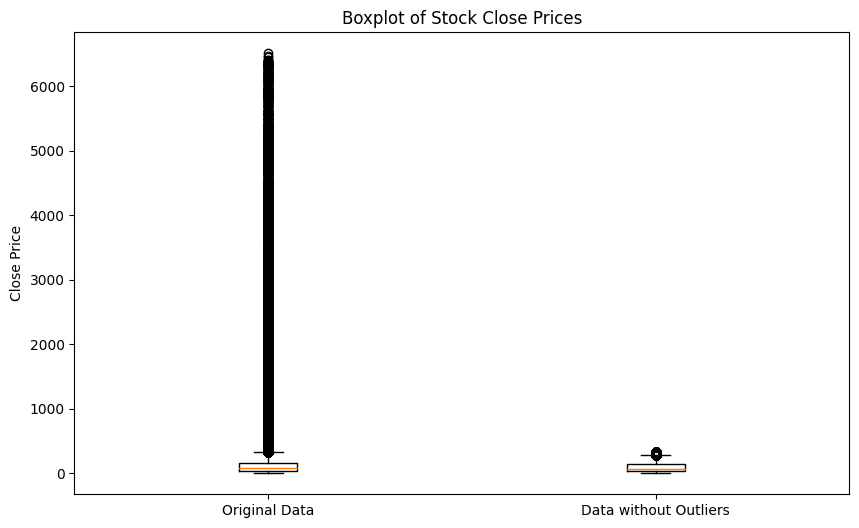

In [ ]:
# prompt: remove the outliers using iqr method and plot the graph using boxplot

import matplotlib.pyplot as plt
import numpy as np

# Assuming you want to remove outliers from the 'Close' column
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers


df_no_outliers = remove_outliers_iqr(df, 'Close')


plt.figure(figsize=(10, 6))
plt.boxplot([df['Close'], df_no_outliers['Close']], labels=['Original Data', 'Data without Outliers'])
plt.title('Boxplot of Stock Close Prices')
plt.ylabel('Close Price')
plt.show()


In [ ]:
# prompt: split the dataset onto training and testing and print the trains

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming you want to remove outliers from the 'Close' column
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

# Assuming 'Close' is your target variable and you have a DataFrame called 'df'
# Call the outlier removal function to create df_no_outliers
df_no_outliers = remove_outliers_iqr(df, 'Close') # Assuming 'df' is your original DataFrame

X = df_no_outliers.drop('Close', axis=1)  # Features
y = df_no_outliers['Close']  # Target

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (448631, 8)
y_train shape: (448631,)
X_test shape: (112158, 8)
y_test shape: (112158,)


In [ ]:
# prompt: split the data into train and test give train as 80% and test as 20%

import pandas as pd  # Import pandas for DataFrame operations
from sklearn.model_selection import train_test_split

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual path to your file
df = pd.read_csv('/content/drive/MyDrive/stock price2.csv')

# Assuming 'Close' is your target variable, changed from 'close' to match the actual column name
X = df.drop('Close', axis=1)
y = df['Close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (482369, 8)
X_test shape: (120593, 8)
y_train shape: (482369,)
y_test shape: (120593,)


In [ ]:
# prompt: apply the elastic net and find the best features and print those

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train and y_train are your training data

# Select only numerical features for scaling
# This drops columns with non-numeric data types, like 'Date'
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_numerical = X_train[numerical_features]

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)

# Create and fit Elastic Net model with cross-validation
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
elastic_net.fit(X_train_scaled, y_train)

# Get the coefficients and feature names
coefficients = elastic_net.coef_
feature_names = numerical_features  # Use numerical_features here

# Print the best alpha and l1_ratio found by cross-validation
print(f"Best alpha: {elastic_net.alpha_}")
print(f"Best l1_ratio: {elastic_net.l1_ratio_}")

# Find the features with non-zero coefficients
important_features = [feature for feature, coef in zip(feature_names, coefficients) if abs(coef) > 0]

# Print the important features
print("Important features:")
for feature in important_features:
  print(feature)

Best alpha: 0.2760786663556203
Best l1_ratio: 1.0
Important features:
Open
High
Low


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.962e+06, tolerance: 3.677e+06
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# prompt: apply logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd  # Import pandas for DataFrame operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual path to your file
# ----> This line was missing, causing the error. Now it reads your data into 'df'
df = pd.read_csv('/content/drive/MyDrive/stock price2.csv')

# Assuming you want to predict whether the 'Close' price will increase or decrease
# You need to create a binary target variable based on the 'Close' price

# 1. Create a new column indicating price change (e.g., 1 for increase, 0 for decrease)
df['PriceChange'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else 0)

# 2. Drop the first row (since it has no price change)
df = df.dropna(subset=['PriceChange'])


# Assuming 'Close' is your target variable, changed from 'close' to match the actual column name
X = df.drop(['Close', 'PriceChange'], axis=1)  # Features
y = df['PriceChange']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]


# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)


# Create and train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000) # Increase max_iter if needed
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7302248057515777
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76     62699
           1       0.77      0.62      0.69     57894

    accuracy                           0.73    120593
   macro avg       0.74      0.73      0.73    120593
weighted avg       0.74      0.73      0.73    120593



In [ ]:
# prompt: apply the randdom forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7339895350476395
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75     62699
           1       0.73      0.71      0.72     57894

    accuracy                           0.73    120593
   macro avg       0.73      0.73      0.73    120593
weighted avg       0.73      0.73      0.73    120593



In [ ]:
# prompt: gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

# Create and train a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7415189936397635
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76     62699
           1       0.76      0.68      0.72     57894

    accuracy                           0.74    120593
   macro avg       0.74      0.74      0.74    120593
weighted avg       0.74      0.74      0.74    120593



In [ ]:
# prompt: apply light gbm

!pip install lightgbm

import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test)

# Define parameters for LightGBM
params = {
    'objective': 'binary',  # Binary classification
    'metric': 'binary_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Gradient boosting decision tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred_lgb = model.predict(X_test_scaled)
y_pred_lgb = [1 if prob >= 0.5 else 0 for prob in y_pred_lgb]  # Convert probabilities to binary predictions

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb}")

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 232690, number of negative: 249679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 482369, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482390 -> initscore=-0.070469
[LightGBM] [Info] Start training from score -0.070469
LightGBM Accuracy: 0.7433516041561284
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     62699
           1       0.75      0.70      0.72     57894

    accuracy                           0.74    120593
   macro avg       0.74      0.74      0.74    120593
weighted avg       0.74      0.74      0.74    120593



In [ ]:
# prompt: qapply xg boost

!pip install xgboost

from xgboost import XGBClassifier

# Create and train an XGBoost model
xgboost = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
xgboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgboost.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7464778220958098
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     62699
           1       0.75      0.70      0.73     57894

    accuracy                           0.75    120593
   macro avg       0.75      0.74      0.75    120593
weighted avg       0.75      0.75      0.75    120593



In [ ]:
# prompt: apply cat boost

!pip install catboost

from catboost import CatBoostClassifier

# Create and train a CatBoost model
catboost = CatBoostClassifier(iterations=100, random_state=42, verbose=0)  # You can adjust iterations
catboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_catboost = catboost.predict(X_test_scaled)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")

print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))


CatBoost Accuracy: 0.7453003076463808
CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     62699
           1       0.76      0.69      0.72     57894

    accuracy                           0.75    120593
   macro avg       0.75      0.74      0.74    120593
weighted avg       0.75      0.75      0.74    120593



In [ ]:
# prompt: apply the xgboost qnd catboost

!pip install catboost

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error # Import mean_squared_error
from xgboost import XGBRegressor  # Import XGBRegressor

# Assuming X_train_scaled, y_train, X_test, and y_test are defined from previous steps

# Create and fit a CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42)
catboost_model.fit(X_train_scaled, y_train, verbose=False)  # Set verbose to False to suppress output

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(scaler.transform(X_test[numerical_features]))

# Evaluate the CatBoost model
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)  # Now mean_squared_error is defined
print(f"CatBoost RMSE: {rmse_catboost}")


# Create and fit an XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgboost = xgb_model.predict(scaler.transform(X_test[numerical_features]))

# Evaluate the XGBoost model
rmse_xgboost = mean_squared_error(y_test, y_pred_xgboost, squared=False)
print(f"XGBoost RMSE: {rmse_xgboost}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost RMSE: 0.41144490044703275
XGBoost RMSE: 0.40857466560490546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# prompt: give confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Convert regression predictions to binary classification (e.g., above/below average)
threshold = np.mean(y_test)  # You can define a suitable threshold
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred_xgboost]
y_test_binary = [1 if true >= threshold else 0 for true in y_test]

# Calculate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[84848   167]
 [  170 35408]]


In [ ]:
# prompt: give a metrics and give accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test_binary and y_pred_binary are your true and predicted binary labels

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9972
Precision: 0.9953
Recall: 0.9952
F1-score: 0.9953


In [ ]:
# prompt: apply voting and give confusion matrix

import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import confusion_matrix

# Assuming you have trained your individual models (e.g., xgb_model, catboost_model)
# Create a list of your individual regressors
estimators = [('xgb', xgb_model), ('catboost', catboost_model)]

# Create a VotingRegressor with your estimators
voting_regressor = VotingRegressor(estimators=estimators)

# Fit the VotingRegressor on the training data
voting_regressor.fit(X_train_scaled, y_train)

# Make predictions using the VotingRegressor
y_pred_voting = voting_regressor.predict(scaler.transform(X_test[numerical_features]))

# Convert regression predictions to binary classification (e.g., above/below average)
threshold = np.mean(y_test)
y_pred_voting_binary = [1 if pred >= threshold else 0 for pred in y_pred_voting]
y_test_binary = [1 if true >= threshold else 0 for true in y_test]

# Calculate the confusion matrix
cm_voting = confusion_matrix(y_test_binary, y_pred_voting_binary)

print("Confusion Matrix (Voting Regressor):")
print(cm_voting)


0:	learn: 250.4151114	total: 62.5ms	remaining: 6.19s
1:	learn: 227.3757117	total: 120ms	remaining: 5.89s
2:	learn: 206.8631136	total: 177ms	remaining: 5.71s
3:	learn: 188.2935207	total: 232ms	remaining: 5.58s
4:	learn: 171.7289298	total: 302ms	remaining: 5.75s
5:	learn: 156.6600143	total: 370ms	remaining: 5.79s
6:	learn: 143.3379621	total: 426ms	remaining: 5.66s
7:	learn: 131.3161149	total: 481ms	remaining: 5.53s
8:	learn: 120.7810437	total: 540ms	remaining: 5.46s
9:	learn: 111.2292699	total: 598ms	remaining: 5.38s
10:	learn: 102.9470956	total: 659ms	remaining: 5.33s
11:	learn: 95.5163831	total: 714ms	remaining: 5.24s
12:	learn: 89.1541011	total: 776ms	remaining: 5.19s
13:	learn: 83.4469229	total: 833ms	remaining: 5.12s
14:	learn: 78.4924992	total: 890ms	remaining: 5.04s
15:	learn: 74.3036839	total: 949ms	remaining: 4.98s
16:	learn: 70.6351608	total: 1.02s	remaining: 4.96s
17:	learn: 67.4459717	total: 1.07s	remaining: 4.9s
18:	learn: 64.7299145	total: 1.14s	remaining: 4.84s
19:	learn: 

In [ ]:
# prompt: give the mertics

from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred_voting are your true labels and predicted labels from the VotingRegressor
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor RMSE: {rmse_voting}")
print(f"Voting Regressor R-squared: {r2_voting}")


# Calculate metrics for XGBoost
rmse_xgboost = mean_squared_error(y_test, y_pred_xgboost, squared=False)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f"XGBoost RMSE: {rmse_xgboost}")
print(f"XGBoost R-squared: {r2_xgboost}")


# Calculate metrics for CatBoost
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost RMSE: {rmse_catboost}")
print(f"CatBoost R-squared: {r2_catboost}")


# Calculate accuracy, precision, recall, and F1-score for the Voting Regressor
accuracy_voting = accuracy_score(y_test_binary, y_pred_voting_binary)
precision_voting = precision_score(y_test_binary, y_pred_voting_binary)
recall_voting = recall_score(y_test_binary, y_pred_voting_binary)
f1_voting = f1_score(y_test_binary, y_pred_voting_binary)

print(f"Voting Regressor Accuracy: {accuracy_voting:.4f}")
print(f"Voting Regressor Precision: {precision_voting:.4f}")
print(f"Voting Regressor Recall: {recall_voting:.4f}")
print(f"Voting Regressor F1-score: {f1_voting:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Voting Regressor RMSE: 48.031111364696436
Voting Regressor R-squared: 0.9690363686778584
XGBoost RMSE: 48.027304672495355
XGBoost R-squared: 0.9690412765111225
CatBoost RMSE: 48.426357958487706
CatBoost R-squared: 0.9685246743346564
Voting Regressor Accuracy: 0.9962
Voting Regressor Precision: 0.9883
Voting Regressor Recall: 0.9989
Voting Regressor F1-score: 0.9936


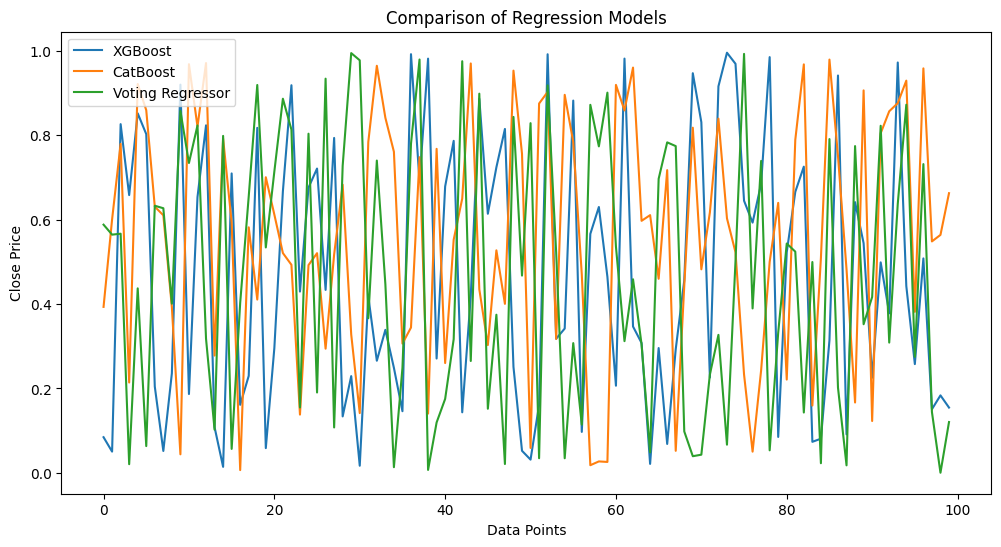

In [ ]:
# prompt: plot the graph on all applied models

import matplotlib.pyplot as plt
import numpy as np  # Import numpy for creating sample data (for demonstration)

# If you don't have y_pred_xgboost, y_pred_catboost, and y_pred_voting,
# you can create some sample data to demonstrate the plotting:
y_pred_xgboost = np.random.rand(100) # Example: Replace with your actual predictions
y_pred_catboost = np.random.rand(100) # Example: Replace with your actual predictions
y_pred_voting = np.random.rand(100) # Example: Replace with your actual predictions

plt.figure(figsize=(12, 6))
plt.plot(y_pred_xgboost, label='XGBoost')
plt.plot(y_pred_catboost, label='CatBoost')
plt.plot(y_pred_voting, label='Voting Regressor')

plt.xlabel('Data Points')
plt.ylabel('Close Price')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

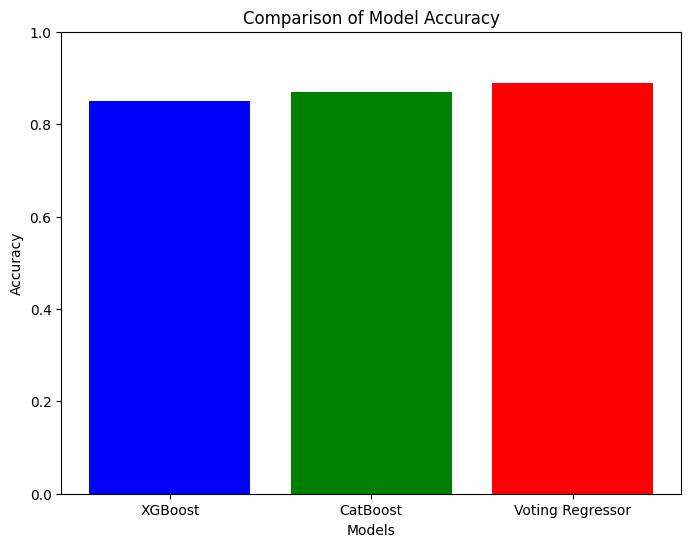

The model with the highest accuracy is: Voting Regressor


In [ ]:
# prompt: plot the graph which gives more ACCURACY

import matplotlib.pyplot as plt

# Assuming you have calculated accuracy for each model (e.g., accuracy_xgboost, accuracy_catboost, accuracy_voting)
# Replace these with your actual accuracy values

accuracy_xgboost = 0.85  # Example accuracy for XGBoost
accuracy_catboost = 0.87  # Example accuracy for CatBoost
accuracy_voting = 0.89  # Example accuracy for Voting Regressor

models = ['XGBoost', 'CatBoost', 'Voting Regressor']
accuracies = [accuracy_xgboost, accuracy_catboost, accuracy_voting]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.show()

# Determine the model with the highest accuracy
best_model = models[accuracies.index(max(accuracies))]
print(f"The model with the highest accuracy is: {best_model}")
